**This code can be used to analyse data given a self-organising map and a DML matrix**

Several files will be loaded in this notebook. If the entire folder was copied from Github and nothing was moved around, only the audio files to be used need to be copied to the folder 'Audio_data', which is present in the Data folder. Alternatively, a different pathway can be specified using the argument Audio_data=...

The others files and folders needed are: three Templates folders: regular, dml and eval with each three subfolders (arrays, dml, rect), the file 'parameters.txt' and the folder 'Modules' containing five modules with code. If *all* of these folders are located somewhere else, the remote control block can be run to change the working directory. If the folders were copied directly from Github, this shouldn't be necessary.

The audio must be of the same type (no mixes of TE and non-TE). The code assumes data is normal, if it is TE, add an argument 'exp_factor' with the expansion factor. If there are multiple channels, add an argument channel='l' or 'r' (left or right).

A possible error is 'ValueError: Incomplete wav chunk'. This is caused by metadata in the wav files which the function cannot read. To fix this, add an extra argument 'sr=...' with the sampling rate. The program will then be able to read this. Otherwise, the sampling rate can be determined automatically.

Press shift+enter to run a block.

**Remote control block** (Optional. Use only if all data is present somewhere else).

In [ ]:
import os
path='C:/Users/arne/Documents/School/Thesis'; #Change this to directory that stores the data
os.chdir(path)

**Import necessary functions** (run unchanged)

In [1]:
from ipywidgets import interact, fixed #interactive plot
import ipywidgets as widgets
from IPython.display import clear_output

import os
path=os.getcwd()
os.chdir(path+'/Modules')
import AD1_Loading as AD1
import AD2_Spectro as AD2
import AD3_Features as AD3
import AD4_SOM as AD4
import AD5_MDS as AD5
os.chdir(path)

**Load a stored SOM and DML-matrix**

Provide the name of the map in 'map_name'. The code will load both map_name.npy and map_name_data.npy (the second part is needed to visualise the map).

The code assumes the map is present in the same folder as this notebook. If this is not the case, provide an alternate pathway by adding 'path=...' to the function.

Load dml works similarly, but doesn't have a data part.

In [2]:
#SOM
map_name='map_walkthrough' #change this to the name of the map
net, raw_data=AD1.import_map(map_name) #if the map is in a different location add 'path=...' here
Dim1=net.shape[0] #size of the map is read automatically
Dim2=net.shape[1]

In [3]:
#DML
dml_name='D_walkthrough' #change this to the name of the matrix
D=AD1.import_dml(dml_name) #if the matrix is in a different location add 'path=...' here

**Visualisation of the map** (run unchanged)

Plots the map in two dimensions to illustrate the different regions. This also allows the user to check if the map works properly. This plot will show the neurons (red) and the data used to fit them (black).

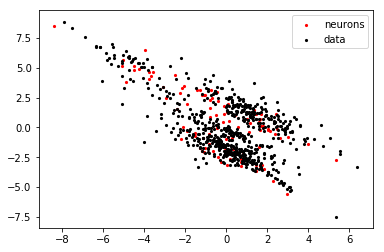

()

In [4]:
#plot MDS
net_features=AD4.calc_net_features(net)
D=AD5.calc_dist_matrix(net_features, 1, raw_data=raw_data)
pos=AD5.calc_pos(D)
AD5.plot_MDS2(pos, Dim1, Dim2)

**List files** (files to be analysed)

There are three options: 

* If 'Full' is set to 'True' every .WAV file inside the Audio_data folder will be analysed.

* If 'Folder_name' is given a name other than 'None', all files within this folder will be analysed (assuming this folder is present within Audio_data). 

* A list of files to be analysed can be provided in List_files. This is location bound. So a file called 'Audio5.WAV' that is in a subfolder 'Location1' must be specified as 'Location1/Audio5.WAV'. 

The code runs in this order. Setting 'Full' to True will ignore the other two commands.

If there are subfolders present, this can be specified by setting 'Subfolders' to True. So if there are four audio files and they are located in folders 'Location1' and 'Location2' which are present in Audio_data, subfolders must be set to True if 'Full' is True. If only Location1 must be analysed, then Full is set to False, Folder_name is set to 'Location1' and 'Subfolders' is set to False. But if there are two folders within Location1 named 'Day1' and 'Day'2, 'Subfolders' must be set to true. If 'Full' is True, there can only be one layer of subfolders (so 'Location1' with 'Day1' and 'Day2' would not work).

The code will ignore every file that doesn't end in .WAV to prevent errors.

In [5]:
Full=False
Folder_name='None'
List_files=['A048_ALO.wav', 'A048_ALU.wav','A049_ALH.wav','A051_ALZ.wav','A051_AMD.wav','A051_AMF.wav']
Subfolders=False

**Calculate regions** (run unchanged)

If the data is TE, add exp_factor to the first function. Channel and sr can be added too if need be.

In [6]:
#M: number of regions matching per neuron
net_label, features, features_key, features_freq, rectangles, regions, spectros, list_files2=AD4.calc_output(List_files, net, full=Full, folder=Folder_name, subfolders=Subfolders) #add extra arguments here
full_region, full_rectangle, full_spectro, full_name=AD4.rearrange_output(net_label, features, features_key, features_freq, rectangles, regions, spectros, list_files2, net, dim1=Dim1, dim2=Dim2)
M=AD4.calc_matching(full_name, dim1=Dim1, dim2=Dim2)

**Visualisations** (run unchanged)

**MDS**

This can be compared with the previous MDS plot. If there are substantial differences, it is likely that the new data is drastically different from the data used to fit the map, which can result in a poor performance.

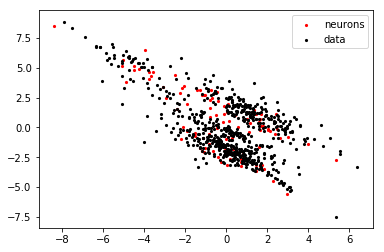

()

In [7]:
#MDS
net_features=AD4.calc_net_features(net)
conc_features=AD5.conc_features(features)
D=AD5.calc_dist_matrix(net_features, 1, raw_data=conc_features)
pos=AD5.calc_pos(D)
AD5.plot_MDS2(pos, Dim1, Dim2)

The heatmap will show how many matches each neuron has. (Neurons are described with two coordinates)

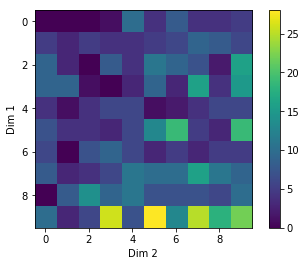

()

In [8]:
#add 'export' to save the figure
AD4.heatmap_neurons(M)

The U-matrix shows the distance of each neuron to the nearest other neuron. A high distance indicates an outlier. A low distance indicates a group of neurons that are close together.

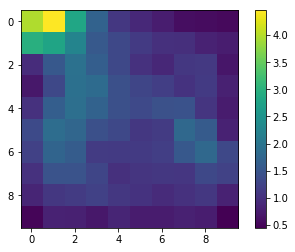

()

In [9]:
#add 'export' to save the figure
AD4.plot_U(net)

**Interactive plot** (run unchanged)

This block will plot the regions. For easy reference, regions are plotted inside a fixed frame that can be adjusted. Regions that are too big are cut off automatically. The plot can be adjusted using the following sliders:

* Dim 1: first dimension, used to select a specific neuron

* Dim 2: second dimension, used to select a specific neuron

* Point: all matches are ordered according to distance. 

* Max_time: width of the plot in ms (between 0 and 10)

* Min_freq: minimum frequency of the plot in kHz (between 20 and 120)

* Max_freq: maximum frequency of the plot in kHz (between 20 and 120)

* Context: If this is enabled, a second plot is shown to the left which is zoomed out more.

* FI: If this is enabled, a second plot is shown to the right which shows a frequency-intensity diagram.

* fig_size: size of the figure

* next point: button that moves to the next point. (If the end of the current plot is reached, dim 1 is raised by 1. If dim 1 is at maximum, dim 2 is raised by 1 and dim 1 is put back to zero. If both are at maximum, nothing will happen.) 

When there are no more matches, an empty plot will be shown with the title: "No more matches. Change sliders."

IntSlider(value=0, description='dim1', max=9)

IntSlider(value=9, description='dim2', max=9)

FloatSlider(value=0.0, description='point', max=27.0, step=1.0)

FloatSlider(value=10.0, description='max time', max=10.0, min=1.0, step=0.5)

IntSlider(value=80, description='max freq', max=120, min=20)

IntSlider(value=20, description='min freq', max=120, min=20)

FloatSlider(value=7.0, description='figure size', max=10.0, min=1.0, step=1.0)

ToggleButton(value=False, description='Context on/off', icon='check')

ToggleButton(value=False, description='FI on/off', icon='check')

ToggleButton(value=False, description='Next point')

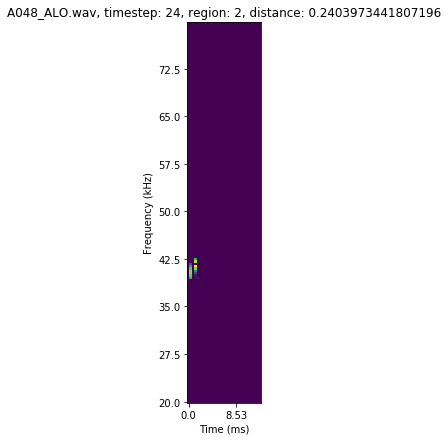

In [47]:
#define widgets
max_c=AD4.calc_maxc(full_name, dim1=Dim1, dim2=Dim2)
w_dim1=widgets.IntSlider(value=0, min=0, max=Dim1-1, step=1, description='dim1')
w_dim2=widgets.IntSlider(value=10, min=0, max=Dim2-1, step=1, description='dim2')
w_point=widgets.FloatSlider(value=0, min=0, max=max_c-1, step=1, description='point')
w_max_time=widgets.FloatSlider(value=10, min=1, max=10, step=0.5, description='max time')
w_max_freq=widgets.IntSlider(value=80, min=20, max=120, step=1, description='max freq')
w_min_freq=widgets.IntSlider(value=20, min=20, max=120, step=1, description='min freq')
w_context = widgets.ToggleButton(value=False, disabled=False, icon='check', description="Context on/off")
w_FI = widgets.ToggleButton(value=False, disabled=False, icon='check', description="FI on/off")
w_fig_size=widgets.FloatSlider(value=7, min=1, max=10, step=1, description='figure size')
w_next=widgets.ToggleButton(value=False, description="Next point")

#display widgets
display(w_dim1)
display(w_dim2)
display(w_point)
display(w_max_time)
display(w_max_freq)
display(w_min_freq)
display(w_fig_size)
display(w_context)
display(w_FI)
display(w_next)
AD4.plot_region_neuron(full_region, full_rectangle, full_spectro, full_name, w_dim1.value,
         w_dim2.value, w_point.value, w_max_time.value, w_min_freq.value, w_max_freq.value, 
         w_context.value, w_FI.value, w_fig_size.value)

#update function
def update_func(x):
    print('check')
    clear_output()
    w_point.max=M[w_dim1.value, w_dim2.value]-1
    display(w_dim1)
    display(w_dim2)
    display(w_point)
    display(w_max_time)
    display(w_max_freq)
    display(w_min_freq)
    display(w_fig_size)
    display(w_context)
    display(w_FI)
    display(w_next)
    AD4.plot_region_neuron(full_region, full_rectangle, full_spectro, full_name, w_dim1.value,
         w_dim2.value, w_point.value, w_max_time.value, w_min_freq.value, w_max_freq.value, 
         w_context.value, w_FI.value, w_fig_size.value)

def update_func2(y):
    if w_next.value: #if True
        if w_point.value<w_point.max: #next point
            w_point.value+=1
        elif w_dim1.value<w_dim1.max: #next neuron dim 1
            w_dim1.value+=1
            w_point.value=0 #set back to zero
        elif w_dim2.value<w_dim2.max: #next neuron dim 2
            w_dim2.value+=1
            w_point.value=0 #set back to zero
            w_dim1.value=0 #set back to zero
        w_next.value=False

#observe the widgets
w_dim1.observe(update_func)
w_dim2.observe(update_func)
w_point.observe(update_func)
w_max_time.observe(update_func)
w_max_freq.observe(update_func)
w_min_freq.observe(update_func)
w_context.observe(update_func)
w_FI.observe(update_func)
w_fig_size.observe(update_func)
w_next.observe(update_func2)

**Features analysis**

**Templates**

To make a new template, fill in the correct file_name, timestep and region_num from the plot above. 
Choose the correct bat name as well. If this folder already exists, the template is added. If not, a new folder is created.
The template_type can be 'regular', 'dml' or 'evaluate' (for the meaning of this, see the documentation). If something else is given, the code defaults to 'regular' and gives a warning.

The code will return the hash-code of template (name under which the template is stored).

In [ ]:
file_name='mdau-1µl1µA052_AJP.wav'
timestep=31
region_num=0
bat_name='mdau'
template_type='regular' #regular, dml or evaluate
AD2.create_template(file_name, timestep, region_num, bat_name, template_type=template_type)

**Correlation plots**

Make correlation plots between the features.

In [ ]:
#Shows the index of every feature
AD1.print_features()

In [ ]:
#Use 'export' to save the fig
index_range=[0, 7] #range over which feature correlations are calculated
corr=AD3.cor_plot(features, index_range)